# Variables

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
from datetime import date
date.today()

datetime.date(2020, 3, 25)

In [12]:
tf.__version__

'2.1.0'

In [13]:
np.__version__

'1.18.1'

NOTE on notation

    _x, _y, _z, ...: NumPy 0-d or 1-d arrays
    _X, _Y, _Z, ...: NumPy 2-d or higer dimensional arrays
    x, y, z, ...: 0-d or 1-d tensors
    X, Y, Z, ...: 2-d or higher dimensional tensors


## Variables 

Q0. Create a variable `w` with an initial value of 1.0 and name `weight`.
Then, print out the value of `w`.

In [14]:
w = tf.Variable(1, name = "weight")
print(w)

<tf.Variable 'weight:0' shape=() dtype=int32_ref>


Q1. Complete this code.

In [16]:
# Create a variable w.
w = tf.Variable(1.0, name="Weight")

# Q. Add 1 to w and assign the value to w.
assign_op = w.assign_add(1)

with tf.Session() as sess:
    sess.run(w.initializer)
    for _ in range(10):
        print(sess.run(w), "=>", end="")
        sess.run(assign_op)
        


1.0 =>2.0 =>3.0 =>4.0 =>5.0 =>6.0 =>7.0 =>8.0 =>9.0 =>10.0 =>

Q2. Complete this code.

In [18]:
w1 = tf.Variable(1.0)
w2 = tf.Variable(2.0)
w3 = tf.Variable(3.0)

out = w1 + w2 + w3

# Q. Add an Op to initialize global variables.
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op) # Initialize all variables.
    print(sess.run(out))


6.0


Q3-4. Complete this code.

In [23]:
V = tf.Variable(tf.truncated_normal([1, 10]))
# Q3. Initialize `W` with 2 * W
W = tf.Variable(2* V.initialized_value())

Z = 2*V

# Q4. Add an Op to initialize global variables.
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op) # Initialize all variables.
    _V, _W,_Z = sess.run([V, W,Z])
    print(_V)
    print(_W)
    print(_Z)
    assert np.array_equiv(_V * 2.0, _W)

# Compare the value of `W` with Z = 2 * V. 

[[ 0.1879698  -0.42394763  0.3324586   1.7533396   0.04689448  1.1129321
  -0.7771358   1.4826115   0.55861175  0.98849285]]
[[ 0.3759396  -0.84789526  0.6649172   3.5066793   0.09378897  2.2258642
  -1.5542716   2.965223    1.1172235   1.9769857 ]]
[[ 0.3759396  -0.84789526  0.6649172   3.5066793   0.09378897  2.2258642
  -1.5542716   2.965223    1.1172235   1.9769857 ]]


Q5-8. Complete this code.

In [24]:
g = tf.Graph()
with g.as_default():
    W = tf.Variable([[0,1],[2,3]], name="Weight", dtype=tf.float32)
    # Q5. Print the name of `W`.
    print("Q5.", W.name)
    # Q6. Print the name of the op of `W`.
    print("Q6.", W.op.name)
    # Q7. Print the data type of `w`.
    print("Q7.", W.dtype)
    # Q8. Print the shape of `w`.
    print("Q8.", W.get_shape().as_list())
    # Q9. Print the rank (or ndims) of `W`.
    print("Q9.", W.get_shape().ndims)
    # Q10. Check if the graph of `W` is the same as `g`.
    print("Q10.", W.graph == g)


Q5. Weight:0
Q6. Weight
Q7. <dtype: 'float32_ref'>
Q8. [2, 2]
Q9. 2
Q10. True


## Variable helper functions 

Q11-15. Complete this code.

In [25]:
tf.reset_default_graph()

w1 = tf.Variable(1.0, name="weight1")
w2 = tf.Variable(2.0, name="weight2", trainable=False)
w3 = tf.Variable(3.0, name="weight3")

with tf.Session() as sess:
    # Q11. Initialize the variables w1 and w2.
    init_op = tf.variables_initializer([w1,w2])
    sess.run(init_op)
    
    # Q12. Print the name of all global variables 
    for v in tf.global_variables():
        print("global variable =>", v.name)
    
    # Q13. Print the name of all trainable variables
    for v in tf.trainable_variables():
        print("trainable_variable =>", v.name)
    
        


global variable => weight1:0
global variable => weight2:0
global variable => weight3:0
trainable_variable => weight1:0
trainable_variable => weight3:0


## Saving and Restoring Variables 

Q14-15. This is a simple example code to find the coefficient of a linear function. (Here y = 2x).
Complete the code.

In [28]:
tf.reset_default_graph()
w = tf.Variable(0.2, 'weight', dtype = tf.float32) # <- This is what we want to find. The true value is 2.
x = tf.random_uniform([1])
y = 2. * x # Let's pretend we don't know the coefficient 2 here.
y_hat = w * x
loss = tf.squared_difference(y, y_hat)
train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    saver = tf.train.Saver()
    for step in range(1, 10001):
        sess.run(train_op)
        
        import os
        if not os.path.exists('model'): os.mkdir('model') # Let's make a folder in order not to discrupt our current folder.
            
        if step % 1000 == 0:
            print(sess.run(w), "=>", end="")
            
            # Q14. Save the checkpoint file, giving it a base name of `model/my-model`
            ckpt = saver.save(sess,'model/my_model',global_step = step)
            print("Saved successfully")
    
    print(os.listdir('model'))
    # Q15. Find the filename of the latest saved checkpoint file.
    # And if it exists, restore it.
    ckpt = tf.train.latest_checkpoint('model')
    print(ckpt)
    if ckpt is not None:
        saver.restore(sess,ckpt)
        print("Restored succesfully!")
    
    


1.0544442 =>WARNING:tensorflow:Issue encountered when serializing variables.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'weight' has type str, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'weight' has type str, but expected one of: int, long, bool
Saved successfully
1.5201327 =>WARNING:tensorflow:Issue encountered when serializing variables.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'weight' has type str, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'weight' has type str, but expected one of: int, long, bool
Saved successfully
1.746185

## Sharing Variables 

Q16. Complete this code.

In [31]:
g = tf.Graph()
with g.as_default():
    with tf.variable_scope("foo"):
        v = tf.get_variable("vv", [1,])  # v.name == "foo/vv:0"
        
    #Q. Get the existing variable `v`
    with tf.variable_scope("foo", reuse = True):
        v1 = tf.get_variable("vv",[1,])

assert v1 == v    

Q17. Predict the result of this code.

In [32]:
with tf.variable_scope("foo"):
    with tf.variable_scope("bar"):
        v = tf.get_variable("vv", [1])
        print("v.name =", v.name)

v.name = foo/bar/vv:0


Q18. Complete this code.

In [34]:
value = [0, 1, 2, 3, 4, 5, 6, 7]
# Q. Create an initializer with `value`.
init = tf.constant_initializer(value)

tf.reset_default_graph()
x = tf.get_variable('x', shape=[2, 4], initializer=init)

with tf.Session() as sess:
    sess.run(x.initializer)
    print("x =\n", sess.run(x))


x =
 [[0. 1. 2. 3.]
 [4. 5. 6. 7.]]


Q19. Complete this code.

In [39]:
# Q. Create an initializer with a normal distribution of mean equals 0 and standard deviation equals 2.
init = tf.random_normal_initializer(mean = 0,stddev = 2)

tf.reset_default_graph()
x = tf.get_variable('x', shape=[10, 1000], initializer=init)

with tf.Session():
    x.initializer.run()
    _x = x.eval()
    print("Make sure the mean", np.mean(_x), "is close to 0" )
    print("Make sure the standard deviation", np.std(_x), "is close to 2" )
    


Make sure the mean 0.010271651 is close to 0
Make sure the standard deviation 2.004233 is close to 2


Q20. Complete this code.

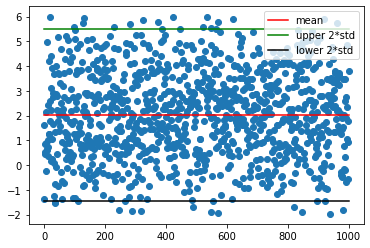

In [40]:
# Q. Create an initializer with a truncated normal distribution of mean equals 0 and standard deviation equals 2.
init = tf.truncated_normal_initializer(mean =2 , stddev =2)

tf.reset_default_graph()
x = tf.get_variable('x', shape=[1000,], initializer=init)

with tf.Session():
    x.initializer.run()
    _x = x.eval()
    plt.scatter(np.arange(1000), _x)
    _avg = np.array([np.mean(_x)] * 1000)
    _std = np.array([np.std(_x)] * 1000)
    plt.plot(np.arange(1000), _avg, 'r-')
    plt.plot(np.arange(1000), _avg + 2*_std, 'g-')
    plt.plot(np.arange(1000), _avg - 2*_std, 'k-')
    plt.legend(['mean', 'upper 2*std', 'lower 2*std'])
    plt.show()
# Note that few data points exceed the bounaries.


Q21. Complete this code.

/home/ashutosh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


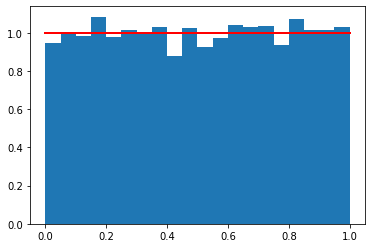

In [41]:
# Q. Create an initializer with a random normal distribution of minimum 0 and maximum 1.
init = tf.random_uniform_initializer(0,1)

tf.reset_default_graph()
x = tf.get_variable('x', shape=[5000,], initializer=init)

with tf.Session():
    x.initializer.run()
    _x = x.eval()
    count, bins, ignored = plt.hist(_x, 20, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()
# Note that few data points exceed the bounaries.


In [44]:
# Check other initializers such as zeros_initializer, ones_initializer, or orthogonal_initializer, as well.
!ls

Audio_Processing.ipynb
Constants_Sequences_and_Random_Values.ipynb
Constants_Sequences_and_Random_Values_Solutions.ipynb
Control_Flow.ipynb
Control_Flow_Solutions.ipynb
figs
Graph.ipynb
Graph_Solutions.ipynb
LICENSE
Math_Part1.ipynb
Math_Part1_Solutions.ipynb
Math_Part2.ipynb
Math_Part2_Solutions.ipynb
Math_Part3.ipynb
Math_Part3_Solutions.ipynb
model
Neural_Network_Part1.ipynb
Neural_Network_Part1_Solutions.ipynb
Neural_Network_Part2.ipynb
Neural_Network_Part2_Solutions.ipynb
Reading_Data.ipynb
Reading_Data_Solutions.ipynb
README.md
Seq2Seq.ipynb
Seq2Seq_solutions.ipynb
Sparse_Tensors.ipynb
Sparse_Tensors-Solutions.ipynb
Tensor_Transformations.ipynb
Tensor_Transformations_Solutions.ipynb
Untitled.ipynb
Variables.ipynb
Variables_Solutions.ipynb


## Exporting and Importing Meta Graphs

Q22. Complete the code. Make sure you've done questions 14-15.

In [54]:
tf.reset_default_graph()
print("Of course, there're no variables since we reset the graph. See", tf.global_variables())
with tf.Session() as sess:
    # Q. Import the saved graph of `model/my-model-10000`.
    new_saver = tf.train.import_meta_graph('model/my_model-10000.meta')
    ckpt = tf.train.latest_checkpoint('model')
    
    new_saver.restore(sess, ckpt)
    
    for v in tf.global_variables():
        print("Now we have a variable", v.name)


Of course, there're no variables since we reset the graph. See []
INFO:tensorflow:Restoring parameters from model/my_model-10000
